# **Mounting the Drive Content**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Required Veersion 

In [ ]:
!pip install tensorflow==2.2.0 keras==2.3.1

     |████████████████████████████████| 516.2MB 36kB/s 
     |████████████████████████████████| 378kB 51.8MB/s 
     |████████████████████████████████| 460kB 42.9MB/s 
     |████████████████████████████████| 3.0MB 36.4MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# **Importing the Library**

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

found


# **Apple Leaf**

# **Data Exploration**

In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/leaf/Apple/train'
test_path = '/content/drive/MyDrive/leaf/Apple/test'

# **Image Preprocessing & Feature Extraction**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 480 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


# **Inception ResNer V2**

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [ ]:
x31 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x31)

In [ ]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=100, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/5
15/15 [==============================] - 183s 12s/step - loss: 1.0956 - accuracy: 0.9250 - val_loss: 528244.4375 - val_accuracy: 0.3333
Epoch 2/5
15/15 [==============================] - 10s 661ms/step - loss: 0.3074 - accuracy: 0.9604 - val_loss: 140550.1562 - val_accuracy: 0.4750
Epoch 3/5
15/15 [==============================] - 10s 666ms/step - loss: 0.1657 - accuracy: 0.9667 - val_loss: 2640016.7500 - val_accuracy: 0.3187
Epoch 4/5
15/15 [==============================] - 10s 663ms/step - loss: 0.1288 - accuracy: 0.9604 - val_loss: 5111570.0000 - val_accuracy: 0.3333
Epoch 5/5
15/15 [==============================] - 10s 663ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 237492.5625 - val_accuracy: 0.3333


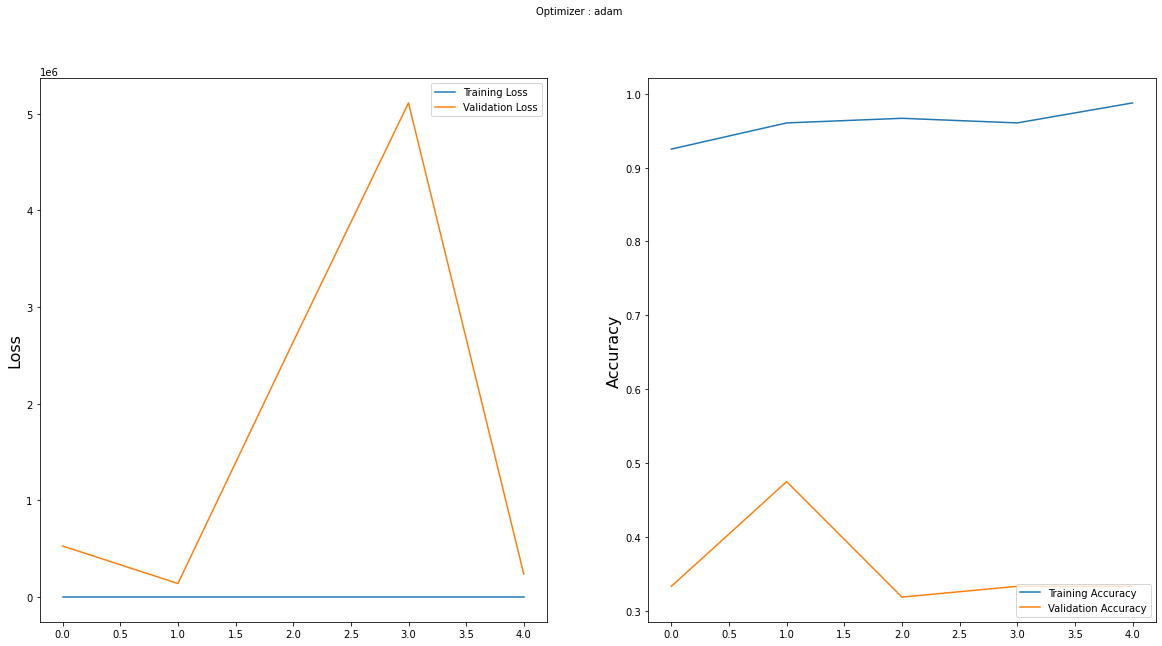

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **AlexNet**

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [ ]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))
#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(3))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [ ]:
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 56, 56, 96)        34944     
_________________________________________________________________
activation_203 (Activation)  (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 28, 28, 256)       614656    
_________________________________________________________________
activation_204 (Activation)  (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 14, 14, 384)      

In [ ]:
AlexNet.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [ ]:
r2 = AlexNet.fit_generator(train_set, validation_data=test_set, epochs=1000, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/200
15/15 [==============================] - 8s 514ms/step - loss: 1.0994 - accuracy: 0.3042 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 2/200
15/15 [==============================] - 8s 516ms/step - loss: 1.0970 - accuracy: 0.3771 - val_loss: 1.0813 - val_accuracy: 0.3542
Epoch 3/200
15/15 [==============================] - 8s 517ms/step - loss: 1.0939 - accuracy: 0.3187 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 4/200
15/15 [==============================] - 8s 518ms/step - loss: 1.0993 - accuracy: 0.3417 - val_loss: 1.0978 - val_accuracy: 0.3542
Epoch 5/200
15/15 [==============================] - 8s 518ms/step - loss: 1.0981 - accuracy: 0.3542 - val_loss: 1.1236 - val_accuracy: 0.3333
Epoch 6/200
15/15 [==============================] - 8s 511ms/step - loss: 1.1064 - accuracy: 0.3500 - val_loss: 1.0978 - val_accuracy: 0.3542
Epoch 7/200
15/15 [==============================] - 8s 512ms/step - loss: 1.0979 - accuracy: 0.3521 - val_loss: 1.0975 - val_accuracy: 0.3542

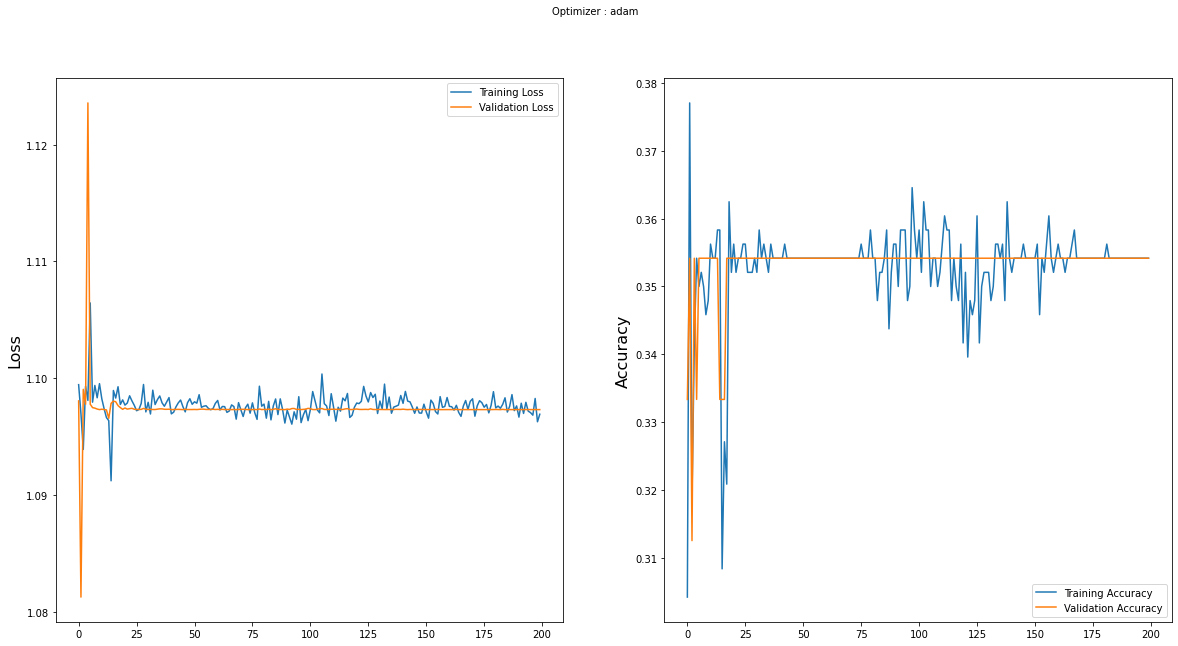

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Model Saving**

In [ ]:
modelss.save('/content/drive/MyDrive/leaf/model-apple.h5')

# **Tomato Leaf Disease**

# **Image Exploration**

In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path1 = '/content/drive/MyDrive/leaf/input-leaf'
test_path1 = '/content/drive/MyDrive/leaf/input-leaf'

# **Image Preprocessing & Feature Extraction**

In [ ]:
train_datagen1 = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen1 = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set1 = train_datagen1.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set1 = test_datagen1.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 478 images belonging to 2 classes.
Found 478 images belonging to 2 classes.


# **Inception ResNet V2**

In [ ]:
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x31 = Flatten()(inc.output)
predictionss = Dense(2, activation='softmax')(x31)

In [ ]:
modelss1 = Model(inputs = inc.inputs, outputs = predictionss)
modelss1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_209 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_209[0][0]                 
__________________________________________________________________________________________________
activation_212 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
____________________________________________________________________________________________

In [ ]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=100, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/100
15/15 [==============================] - 13s 843ms/step - loss: 0.0644 - accuracy: 0.9854 - val_loss: 90560.5078 - val_accuracy: 0.4042
Epoch 2/100
15/15 [==============================] - 10s 656ms/step - loss: 0.2629 - accuracy: 0.9833 - val_loss: 79526.4922 - val_accuracy: 0.4313
Epoch 3/100
15/15 [==============================] - 10s 654ms/step - loss: 0.2239 - accuracy: 0.9688 - val_loss: 345064608.0000 - val_accuracy: 0.3333
Epoch 4/100
15/15 [==============================] - 10s 652ms/step - loss: 0.0907 - accuracy: 0.9792 - val_loss: 3859716352.0000 - val_accuracy: 0.3333
Epoch 5/100
15/15 [==============================] - 10s 651ms/step - loss: 0.6228 - accuracy: 0.9729 - val_loss: 49453.2383 - val_accuracy: 0.4792
Epoch 6/100
15/15 [==============================] - 10s 648ms/step - loss: 1.9936 - accuracy: 0.9625 - val_loss: 3466624.0000 - val_accuracy: 0.2542
Epoch 7/100
15/15 [==============================] - 10s 646ms/step - loss: 0.1505 - accuracy: 0.9500

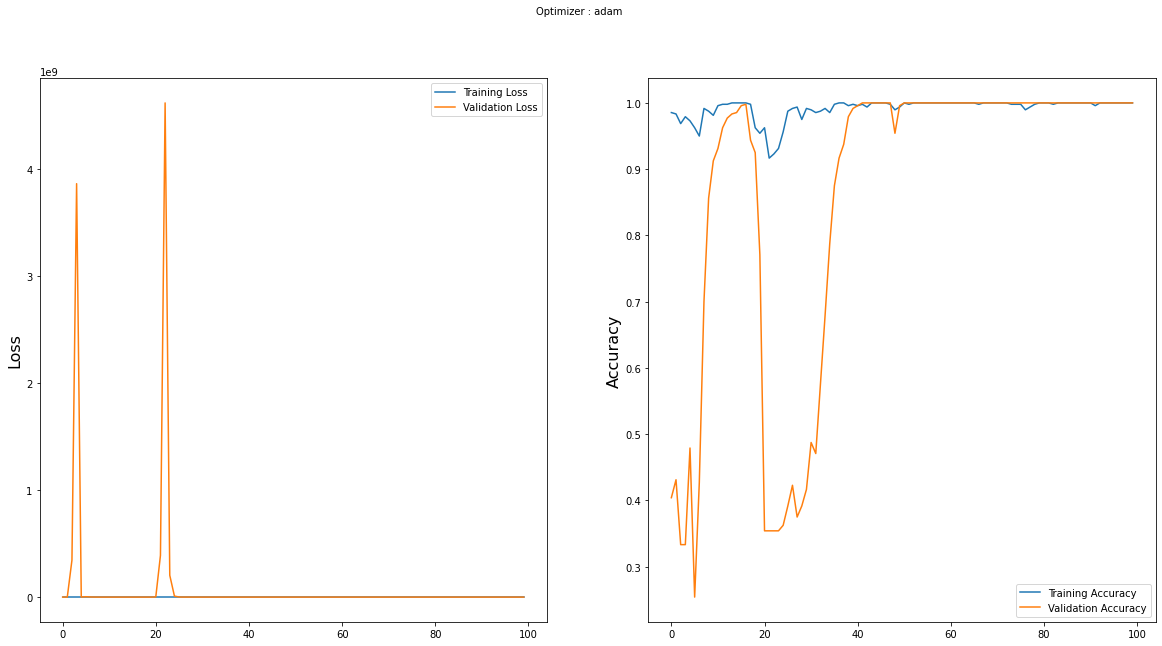

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **AlexNet Model**

In [ ]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))
#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [ ]:
AlexNet.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [ ]:
r2 = AlexNet.fit_generator(train_set1, validation_data=test_set1, epochs=1000, steps_per_epoch=len(train_set1), validation_steps=len(test_set1))
x=r2

Epoch 1/100
15/15 [==============================] - 167s 11s/step - loss: 1.0891 - accuracy: 0.5063 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
15/15 [==============================] - 8s 544ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
15/15 [==============================] - 8s 546ms/step - loss: 0.6936 - accuracy: 0.5084 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
15/15 [==============================] - 8s 551ms/step - loss: 0.6941 - accuracy: 0.4791 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
15/15 [==============================] - 8s 550ms/step - loss: 0.6932 - accuracy: 0.4833 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
15/15 [==============================] - 8s 547ms/step - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
15/15 [==============================] - 8s 545ms/step - loss: 0.6949 - accuracy: 0.4728 - val_loss: 0.6933 - val_accuracy: 0.5000

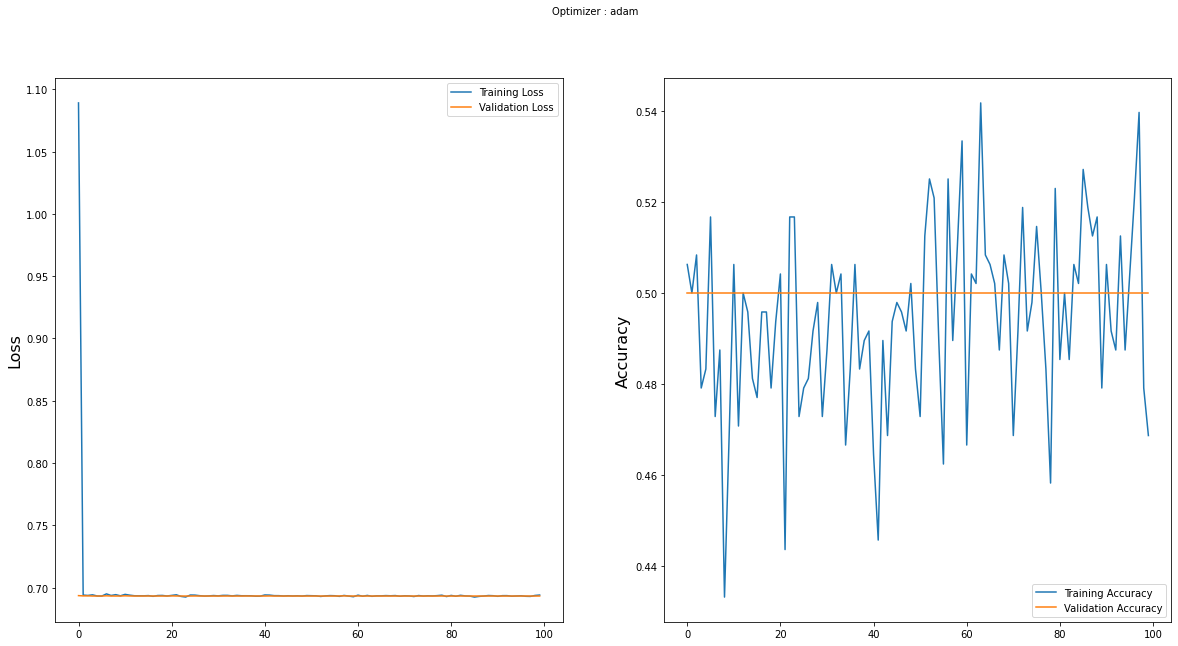

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Model Saving**

In [ ]:
modelss1.save('/content/drive/MyDrive/leaf/model-leaf.h5')